<a href="https://colab.research.google.com/github/mhlaghari/Mini-Food-Vision-Pytorch/blob/main/Mini_Food_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Food Vision 🍔

🍔🍕 Unleashing the Power of Computer Vision on Food! 🍣🥩

Excited to share my latest computer vision project - "Mini Food Vision" 📸🔍

In this endeavor, I delved into the captivating realm of the Food 101 dataset 🍽️. With a twist, I narrowed my focus to just three delectable classes - pizza, steak, and sushi 🍕🥩🍣. But here's the intriguing part - I worked with a mere 10% of the data, proving that even a small slice can lead to impressive results.

Utilizing Convolutional Neural Networks (CNN), I embarked on a journey to predict food classifications 🧠🌐. The power of CNNs lies in their ability to capture intricate patterns within images, making them a perfect match for recognizing diverse dishes.

This project not only ignited my passion for both computer vision and gastronomy but also showcased the potential of AI to recognize the nuances of different cuisines. It's all about training models to appreciate the artistry behind a perfectly baked pizza, a sizzling steak, or the delicate presentation of sushi rolls.

So, whether you're a tech enthusiast, a food lover, or simply curious about the convergence of AI and culinary delights, stay tuned for the unveiling of "Mini Food Vision" 🎉🤖



In [ ]:
# Check for GPU
!nvidia-smi

Wed Aug 16 09:04:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.0.1+cu118


'cuda'

##1. Loading the data

In [ ]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [ ]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
# Setup train and testing paths
# Setup training and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/steak/97656.jpg
Image class: steak
Image height: 512
Image width: 512


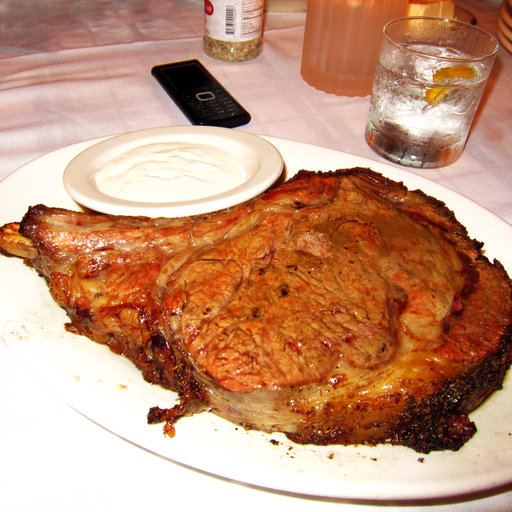

In [ ]:
# Visualize an image
import random
from PIL import Image

# Set seed
random.seed(42) #

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg")) # */*/*/ to get pictures from all paths

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

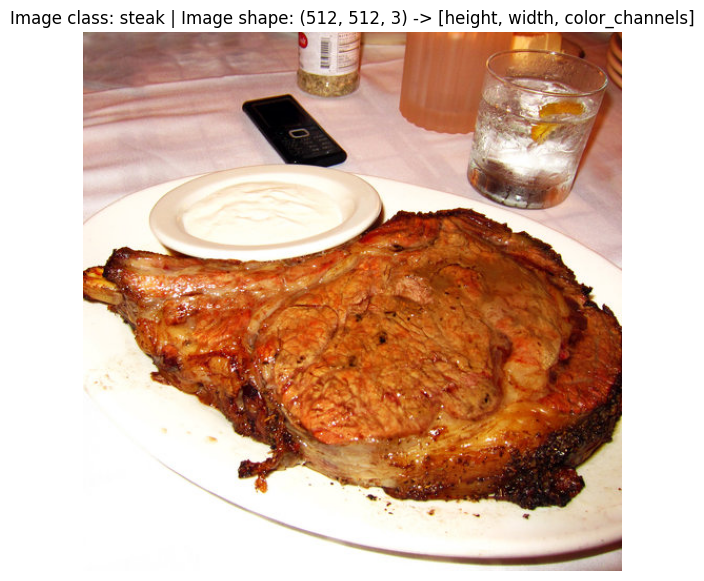

In [ ]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [ ]:
# 3.1 Transforming data with torchvision.transforms
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Write a transform for image
data_transform = transforms.Compose([
    #resize our images to 64x64
    transforms.Resize(size=(64,64)),
    # Flip the images randomly on the horizontal
    #transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [ ]:
# Write transform for turning images into tensors


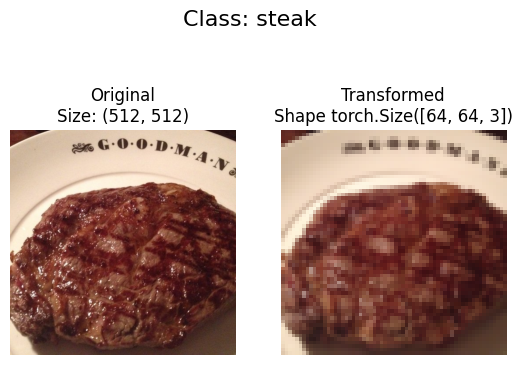

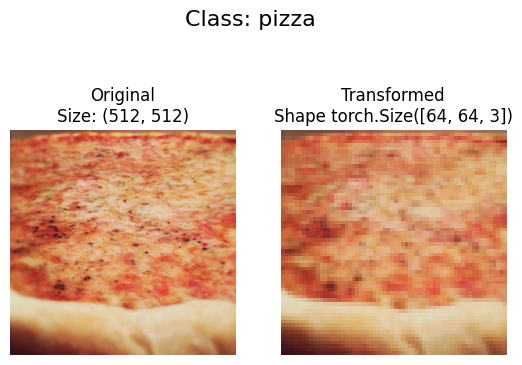

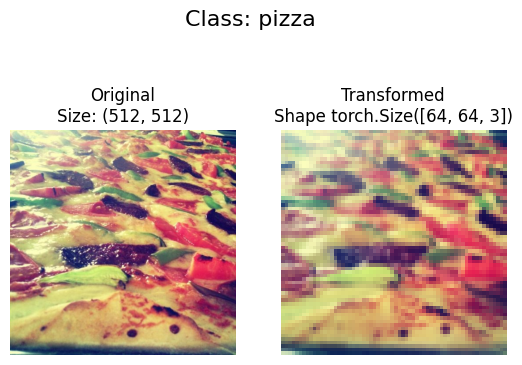

In [ ]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plt target image
      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}" , fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)

### 1.1 Load image data using `ImageFolder`

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [ ]:
# Turn train and test Datasets into DataLoaders
import os
NUM_WORKERS=os.cpu_count()
BATCH_SIZE=1

from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7aba1da6f910>,
 <torch.utils.data.dataloader.DataLoader at 0x7aba17b38ac0>)

In [ ]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(225, 75)

## 2. Creating a baseline `model_0` using CNN architecture

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape, output_shape, hidden_units):
    super().__init__()
    self.layer_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2))
    self.layer_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16, #TEST for this part
                  out_features=output_shape)
    )
  def forward(self, x):
    x = self.layer_1(x)
    #print(x.shape)
    x = self.layer_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (layer_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

## 3. Create training and testing functions for `model_0`.

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 4. Training the model and testing it with various hyperparameters


In [ ]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1183 | train_acc: 0.2978 | test_loss: 1.0972 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.1006 | train_acc: 0.2844 | test_loss: 1.0994 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0992 | train_acc: 0.3022 | test_loss: 1.0997 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.3378 | test_loss: 1.1000 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0989 | train_acc: 0.3378 | test_loss: 1.1005 | test_acc: 0.3333


In [ ]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr=0.001)

model_1_results = train(model_1,
                        train_dataloader,
                        test_dataloader,
                        optimizer,
                        epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1183 | train_acc: 0.2978 | test_loss: 1.0972 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.1006 | train_acc: 0.2844 | test_loss: 1.0994 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0992 | train_acc: 0.3022 | test_loss: 1.0997 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.3378 | test_loss: 1.1000 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0989 | train_acc: 0.3378 | test_loss: 1.1005 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0992 | train_acc: 0.3467 | test_loss: 1.1009 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.1039 | train_acc: 0.3556 | test_loss: 1.1012 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0984 | train_acc: 0.3467 | test_loss: 1.1025 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.1202 | train_acc: 0.3422 | test_loss: 1.1032 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0874 | train_acc: 0.3333 | test_loss: 1.1028 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0990 | train_acc: 0.3467 | test_loss: 1.1030 | test_acc: 0.3333
Epoch: 12 | train_l

In [ ]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(),
                             lr=0.001)

model_2_results = train(model_2,
                        train_dataloader,
                        test_dataloader,
                        optimizer,
                        epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1183 | train_acc: 0.2978 | test_loss: 1.0972 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.1006 | train_acc: 0.2844 | test_loss: 1.0994 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0992 | train_acc: 0.3022 | test_loss: 1.0997 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.3378 | test_loss: 1.1000 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0989 | train_acc: 0.3378 | test_loss: 1.1005 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1010 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.1006 | train_acc: 0.3911 | test_loss: 1.1164 | test_acc: 0.2667
Epoch: 8 | train_loss: 1.0890 | train_acc: 0.3867 | test_loss: 1.1001 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1003 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1006 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1012 | test_acc: 0.3333
Epoch: 12 | train_l

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 5. Double the number of hidden units in the model and train it for 20 epochs

In [ ]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_3 = TinyVGG(input_shape=3,
                  hidden_units=20, # use 20 hidden units instead of 10
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)

model_3_results = train(model=model_3,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=20) # train for 20 epochs

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0957 | train_acc: 0.3911 | test_loss: 1.0627 | test_acc: 0.4133
Epoch: 2 | train_loss: 0.9991 | train_acc: 0.5600 | test_loss: 1.0024 | test_acc: 0.4267
Epoch: 3 | train_loss: 0.9087 | train_acc: 0.5822 | test_loss: 0.9736 | test_acc: 0.4800
Epoch: 4 | train_loss: 0.8722 | train_acc: 0.6311 | test_loss: 1.0058 | test_acc: 0.4933
Epoch: 5 | train_loss: 0.8141 | train_acc: 0.6178 | test_loss: 1.0340 | test_acc: 0.4133
Epoch: 6 | train_loss: 0.7825 | train_acc: 0.6578 | test_loss: 1.0514 | test_acc: 0.4400
Epoch: 7 | train_loss: 0.6926 | train_acc: 0.6889 | test_loss: 1.1946 | test_acc: 0.4800
Epoch: 8 | train_loss: 0.5759 | train_acc: 0.7556 | test_loss: 1.6437 | test_acc: 0.4400
Epoch: 9 | train_loss: 0.5294 | train_acc: 0.8133 | test_loss: 1.4281 | test_acc: 0.3733
Epoch: 10 | train_loss: 0.4309 | train_acc: 0.8356 | test_loss: 1.7349 | test_acc: 0.4400
Epoch: 11 | train_loss: 0.2836 | train_acc: 0.8889 | test_loss: 1.8810 | test_acc: 0.4000
Epoch: 12 | train_l

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 6. Doubling the data to 20%
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [ ]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [ ]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.


Excellent, we now have double the training and testing images...

In [ ]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [ ]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create datasets
train_data_20_percent = ImageFolder(train_data_20_percent_path,
                                    transform=simple_transform)
test_data_20_percent = ImageFolder(test_data_20_percent_path,
                                   transform=simple_transform)

# Create dataloaders
train_dataloader_20_percent = DataLoader(train_data_20_percent,
                                         batch_size=32,
                                         num_workers=os.cpu_count(),
                                         shuffle=True)

test_dataloader_20_percent = DataLoader(test_data_20_percent,
                                        batch_size=32,
                                        num_workers=os.cpu_count(),
                                        shuffle=False)

In [ ]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_4 = TinyVGG(input_shape=3,
                  hidden_units=20, # use 20 hidden units instead of 10
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_4.parameters(), lr=0.001)

model_4_results = train(model=model_4,
                        train_dataloader=train_dataloader_20_percent, # use double the training data
                        test_dataloader=test_dataloader_20_percent, # use double the testing data
                        optimizer=optimizer,
                        epochs=20) # train for 20 epochs

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1041 | train_acc: 0.3312 | test_loss: 1.1005 | test_acc: 0.2875
Epoch: 2 | train_loss: 1.0837 | train_acc: 0.3583 | test_loss: 1.0690 | test_acc: 0.4557
Epoch: 3 | train_loss: 1.0311 | train_acc: 0.4437 | test_loss: 0.9665 | test_acc: 0.4955
Epoch: 4 | train_loss: 0.9116 | train_acc: 0.5563 | test_loss: 0.9174 | test_acc: 0.5563
Epoch: 5 | train_loss: 0.8695 | train_acc: 0.6312 | test_loss: 0.9329 | test_acc: 0.4898
Epoch: 6 | train_loss: 0.8267 | train_acc: 0.6562 | test_loss: 1.0348 | test_acc: 0.5057
Epoch: 7 | train_loss: 0.8981 | train_acc: 0.5771 | test_loss: 0.8924 | test_acc: 0.5307
Epoch: 8 | train_loss: 0.7653 | train_acc: 0.6750 | test_loss: 0.8806 | test_acc: 0.6136
Epoch: 9 | train_loss: 0.7675 | train_acc: 0.6604 | test_loss: 0.9532 | test_acc: 0.5210
Epoch: 10 | train_loss: 0.7869 | train_acc: 0.6521 | test_loss: 0.8773 | test_acc: 0.5977
Epoch: 11 | train_loss: 0.7326 | train_acc: 0.6792 | test_loss: 0.8735 | test_acc: 0.6562
Epoch: 12 | train_l

## 7. Making a prediction on my custom image of pizza


In [ ]:
custom_image = '/content/Screenshot 2023-08-16 at 10.06.50 AM.png'

In [ ]:
# Load the image
import torchvision
img = torchvision.io.read_image(custom_image)
img

tensor([[[177, 181, 183,  ...,  30,  30,  30],
         [187, 190, 186,  ...,  30,  30,  30],
         [184, 191, 193,  ...,  30,  30,  30],
         ...,
         [  9,  13,   8,  ...,  30,  30,  30],
         [  4,  10,   8,  ...,  30,  30,  30],
         [  1,   3,   3,  ...,  30,  30,  30]],

        [[107, 109, 110,  ...,  30,  30,  30],
         [118, 119, 116,  ...,  30,  30,  30],
         [116, 124, 124,  ...,  30,  30,  30],
         ...,
         [  9,  13,   8,  ...,  30,  30,  30],
         [  4,  10,   8,  ...,  30,  30,  30],
         [  1,   3,   3,  ...,  30,  30,  30]],

        [[ 70,  72,  73,  ...,  30,  30,  30],
         [ 82,  83,  79,  ...,  30,  30,  30],
         [ 83,  89,  89,  ...,  30,  30,  30],
         ...,
         [ 10,  13,   9,  ...,  30,  30,  30],
         [  4,  10,   8,  ...,  30,  30,  30],
         [  1,   3,   3,  ...,  30,  30,  30]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [25

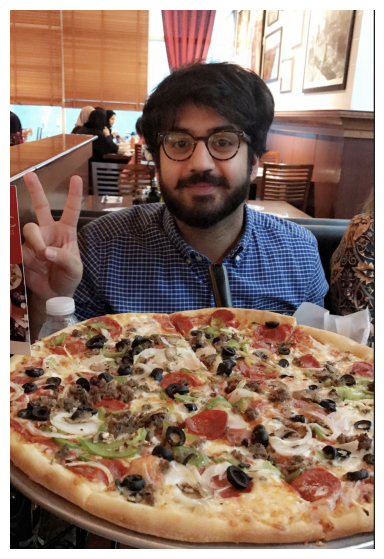

In [ ]:
# View the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0)) # matplotlib likes images in HWC (height, width, color_channels) format not CHW (color_channels, height, width)
plt.axis(False);

In [ ]:
img.shape

torch.Size([4, 1266, 856])

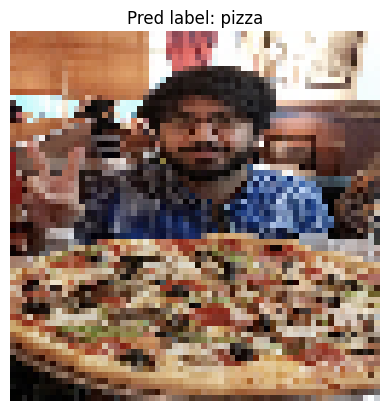

In [ ]:
# Make a prediction on the image
model_4.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.

  # Resize image to 64x64
  resize = transforms.Resize((64, 64))
  img = resize(img)
  img = img[:3, :, :]

  # Turn image in single batch and pass to target device
  batch = img.unsqueeze(0).to(device)

  # Predict on image
  y_pred_logit = model_4(batch)

  # Convert pred logit to pred label
  # pred_label = torch.argmax(torch.softmax(y_pred_logit, dim=1), dim=1)
  pred_label = torch.argmax(y_pred_logit, dim=1) # get same results as above without torch.softmax

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False);